# Exercises

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user, password, host

In [2]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [3]:
# def get_db_url(dbname, username=user, hostname=host, passw=password):
#    url = f'mysql+pymysql://{username}:{passw}@{hostname}/zillow'
#    return url

In [4]:
url = get_db_url('zillow')

In [5]:
df = pd.read_sql('''
SELECT  propertylandusetypeid
        bedroomcnt,
        bathroomcnt,
        calculatedfinishedsquarefeet,
        taxvaluedollarcnt,
        yearbuilt,
        taxamount,
        fips
FROM properties_2017 
JOIN propertylandusetype using (propertylandusetypeid)
WHERE propertylandusedesc = "Single Family Residential"
''', url)

In [6]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,261.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,261.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,261.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,261.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,261.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [7]:
df.shape

(2152863, 7)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152863.0,261.000000,0.000000,261.00,261.00,261.00,261.00,261.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [10]:
df.isnull().sum()

bedroomcnt                         0
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [11]:
# What's the percentage of nulls?
df.isna().mean()

bedroomcnt                      0.000000
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [12]:
# If we drop all rows containing any null, how much data do we have left?
round(df.dropna().shape[0] / df.shape[0], 4)

0.9941

In [13]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("--------------------")

bedroomcnt
261.0    2152863
Name: bedroomcnt, dtype: int64
--------------------
bathroomcnt
2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
--------------------
calculatedfinishedsquarefeet
1200.0     5195
1080.0     4389
1120.0     4362
1400.0     3833
1440.0     3690
           ... 
10613.0       1
9360.0        1
10238.0       1
13748.0       1
24920.0       1
Name: calculatedfinishedsquarefeet, Length

**Takeaways So Far**
- Bedrooms can be an integer
- Bathrooms can stay a float to keep the .5 bathrooms
- Year built, FIPS, and taxvaluedollarcnt can be converted to integers w/o data loss

In [14]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [15]:
# 100% of calculatedfinishedsquarefeet can be converted to int w/o data loss
(df.calculatedfinishedsquarefeet == df.calculatedfinishedsquarefeet.astype(int)).mean()

1.0

In [16]:
# 100% of calculatedfinishedsquarefeet can lose the decimal and be OK
(df.taxvaluedollarcnt == df.taxvaluedollarcnt.astype(int)).mean()

1.0

In [17]:
(df.bathroomcnt == df.bathroomcnt.astype(int)).mean()

0.8925192794249229

In [18]:
# fips, yearbuilt, and bedrooms can be integers
df["fips"] = df["fips"].astype(int)
df["yearbuilt"] = df["yearbuilt"].astype(int)
df["bedroomcnt"] = df["bedroomcnt"].astype(int)
df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)

In [19]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [20]:
df.drop(columns = 'taxamount')

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
4,261,2.0,3633,296425,2005,6037
6,261,4.0,1620,847770,2011,6037
7,261,2.0,2077,646760,1926,6037
11,261,0.0,1200,5328,1972,6037
14,261,0.0,171,6920,1973,6037
...,...,...,...,...,...,...
2152856,261,4.0,4375,422400,2015,6037
2152858,261,3.0,2262,960756,2015,6059
2152859,261,4.5,3127,536061,2014,6059
2152861,261,2.5,1974,424353,2015,6059


In [21]:
df.rename(columns = {'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'sq_ft', 'taxvaluedollarcnt':'property_value', 'yearbuilt':'year_built', 'fips':'location'}, inplace = True)

In [40]:
df = df.replace('6037', 'LA County', inplace=True)

AttributeError: 'NoneType' object has no attribute 'replace'

In [23]:
df.replace('6059', 'Orange County', inplace=True)

In [24]:
df.replace('6111', 'Ventura County', inplace=True)

In [38]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [36]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [26]:
def wrangle_zillow():
    
    import env
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from SQL.
    def get_db_url(dbname, username=env.user, hostname=env.host, passw=env.password):
        url = f'mysql+pymysql://{username}:{passw}@{hostname}/zillow'
        return url

    url = get_db_url('zillow', env.user, env.host, env.password)
    
    df = pd.read_sql('''
        SELECT  propertylandusetypeid
                bedroomcnt,
                bathroomcnt,
                calculatedfinishedsquarefeet,
                taxvaluedollarcnt,
                yearbuilt,
                taxamount,
                fips
        FROM properties_2017 as p17
        WHERE propertylandusetypeid = '261'
        ''', url)

    ## Clean data, dropping rows and converting dtypes ##
    
    # Drop all rows with NaN values.
    df = df.dropna()

    # Converting fips, yearbuilt, and bedrooms, taxvaluedollarcnt, and calculatedfinishedsquarefeet into integers
    df["fips"] = df["fips"].astype(int)
    df["yearbuilt"] = df["yearbuilt"].astype(int)
    df["bedroomcnt"] = df["bedroomcnt"].astype(int)
    df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
    df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)
    
    # Manually handle outliers that do not represent properties likely for 99% of buyers and zillow visitors 
    df = df[df.bathroomcnt <= 6]
    
    df = df[df.bedroomcnt <= 6]

    df = df[df.taxvaluedollarcnt < 2_000_000]
    
    return df

In [27]:
df = wrangle_zillow()

In [28]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    0 non-null      int64  
 1   bathroomcnt                   0 non-null      float64
 2   calculatedfinishedsquarefeet  0 non-null      int64  
 3   taxvaluedollarcnt             0 non-null      int64  
 4   yearbuilt                     0 non-null      int64  
 5   taxamount                     0 non-null      float64
 6   fips                          0 non-null      int64  
dtypes: float64(2), int64(5)
memory usage: 0.0 bytes


In [29]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [30]:
df.shape

(0, 7)

### Visualize Prepped Data

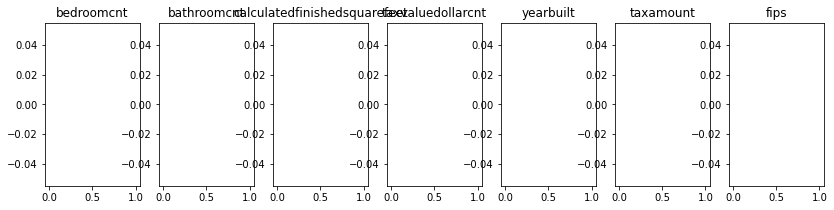

In [31]:
plt.figure(figsize=(16, 3))

# List of columns
for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,8, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)


bedroomcnt


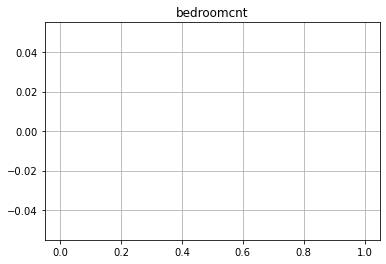

bathroomcnt


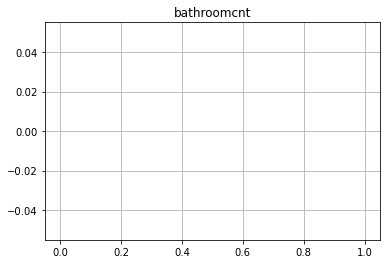

calculatedfinishedsquarefeet


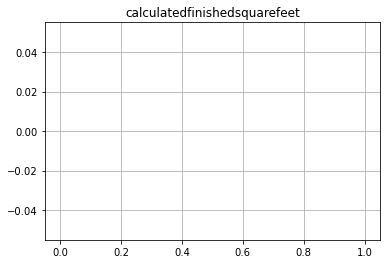

taxvaluedollarcnt


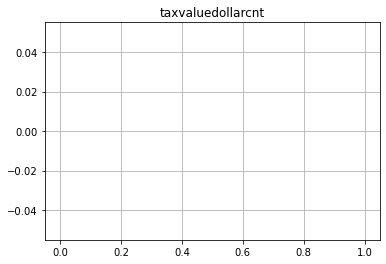

yearbuilt


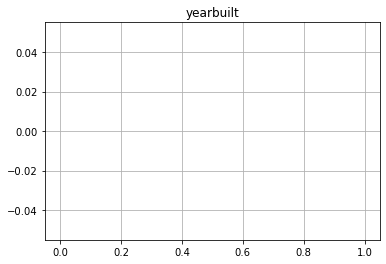

taxamount


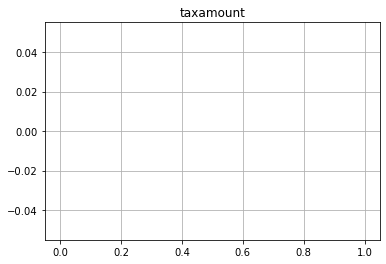

fips


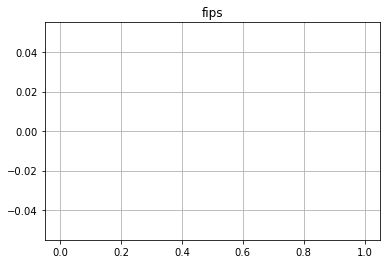

In [32]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

### Handling Outliers

In [33]:
# A football field is 57,600 square feet
df.calculatedfinishedsquarefeet.sort_values(ascending=False).head(10)

Series([], Name: calculatedfinishedsquarefeet, dtype: int64)

In [34]:
df[df.calculatedfinishedsquarefeet >= 25_000].taxvaluedollarcnt.mean()

nan

### Manual Outlier Detection and Filtering

In [35]:
# What percentage of properties have 6 or less bathrooms?
df[df.bathroomcnt <= 6].shape[0] / df.shape[0]

ZeroDivisionError: division by zero

In [ ]:
# What percentage of properties have 6 or less bedrooms?
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

In [ ]:
df[df.taxvaluedollarcnt < 1_500_000].shape[0] / df.shape[0]

In [ ]:
# Manually handle outliers that do not represent properties likely for 99% of buyers and zillow visitors 
df = df[df.bathroomcnt <= 6]

df = df[df.bedroomcnt <= 6]

df = df[df.taxvaluedollarcnt < 2_000_000]

In [ ]:
for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()